## Import libraries

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## Set dataset

In [ ]:
weight = 0.7
bias = 0.3

#create data
start = 0
end = 1
step = 0.02

X= torch.arange(start,end,step).unsqueeze(dim=1)
y= weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

## Split data

In [ ]:
# create train/test split
train_split = int (0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Visualize data

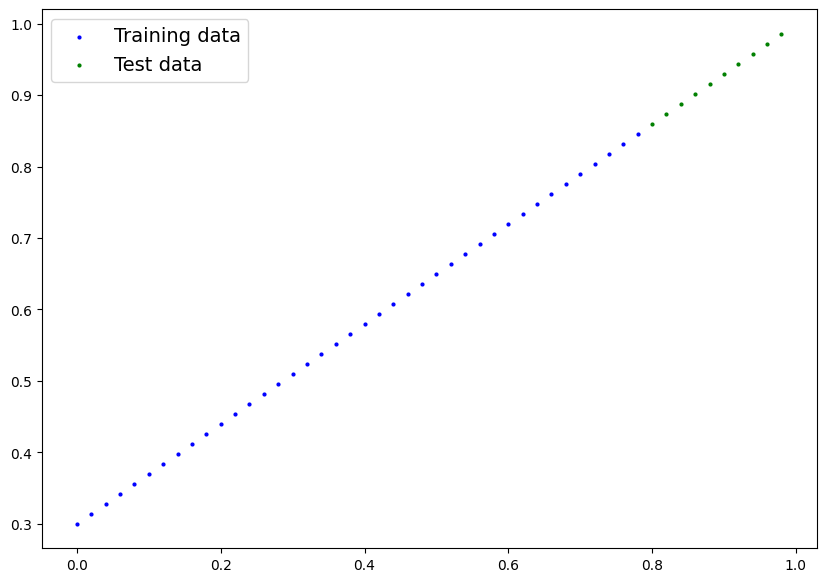

In [ ]:
def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    prediction=None):

#plot training data, test data and compares predictions
  plt.figure(figsize=(10,7))

#plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')

#plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label='Test data')

  if prediction is not None:
    plt.scatter(test_data, prediction, c='r', s=4, label='Predictions')

  plt.legend(prop={'size':14})
plot_prediction()

## Creating model class

In [ ]:
#create a Linear Regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weight = nn.Parameter(torch.randn(1, dtype= torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype= torch.float), requires_grad=True)

#forward defines the computation in the model
  def forward(self,X:torch.tensor) -> torch.Tensor:
    return self.weight * X + self.bias

## Check randomly initialized values

In [ ]:
#set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

#create an instance of the model (This is a subclass of nn.Module that contains nn.Parameter)
model_0 = LinearRegressionModel()

#check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Making prediction

In [ ]:
with torch.inference_mode():
  y_pred = model_0(X_test)

print(f"no of testing samples:{len(X_test)}")
print(f"no of prediction mode:{len(y_test)}")
print(f"no of prediction values:{y_pred}")

no of testing samples:10
no of prediction mode:10
no of prediction values:tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


## Setup loss function and optimizer

In [ ]:
#create the loss function
loss_fn = nn.L1Loss()

#create the optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.01)

## Creating trainig and testing loops

In [ ]:
torch.manual_seed(42)

#set the no of epochs
epochs = 1000

#create empty loss lists to track values
train_loss_values=[]
test_loss_values=[]
epochs_count = []

for epochs in range(epochs):

  #training

  #put model in trainig mode
  model_0.train()

  #1.forwardd pass on the train data using the forward()
  y_pred = model_0(X_train)

  #2.calculate the loss
  loss = loss_fn(y_pred,y_train)

  #3.zero grad of the optimizer
  optimizer.zero_grad()

  #4.loss backward()
  loss.backward()

  #5.progress the optimizer
  optimizer.step()

  #testing

  model_0.eval()

  with torch.inference_mode():
    #1.forward pass on test data
    test_pred = model_0(X_test)

    #2.calculate the loss on test data
    test_loss = loss_fn(test_pred,y_test.type(torch.float))

    #print out the status
    if epochs %10 == 0:
      epochs_count.append(epochs)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f'epoch:{epochs} | MAE train loss: {loss} | MAE test loss:{test_loss}')

epoch:0 | MAE train loss: 0.31288138031959534 | MAE test loss:0.48106518387794495
epoch:10 | MAE train loss: 0.1976713240146637 | MAE test loss:0.3463551998138428
epoch:20 | MAE train loss: 0.08908725529909134 | MAE test loss:0.21729660034179688
epoch:30 | MAE train loss: 0.053148526698350906 | MAE test loss:0.14464017748832703
epoch:40 | MAE train loss: 0.04543796554207802 | MAE test loss:0.11360953003168106
epoch:50 | MAE train loss: 0.04167863354086876 | MAE test loss:0.09919948130846024
epoch:60 | MAE train loss: 0.03818932920694351 | MAE test loss:0.08886633068323135
epoch:70 | MAE train loss: 0.03476089984178543 | MAE test loss:0.0805937647819519
epoch:80 | MAE train loss: 0.03132382780313492 | MAE test loss:0.07232122868299484
epoch:90 | MAE train loss: 0.02788739837706089 | MAE test loss:0.06473556160926819
epoch:100 | MAE train loss: 0.024458957836031914 | MAE test loss:0.05646304413676262
epoch:110 | MAE train loss: 0.021020207554101944 | MAE test loss:0.04819049686193466
epo

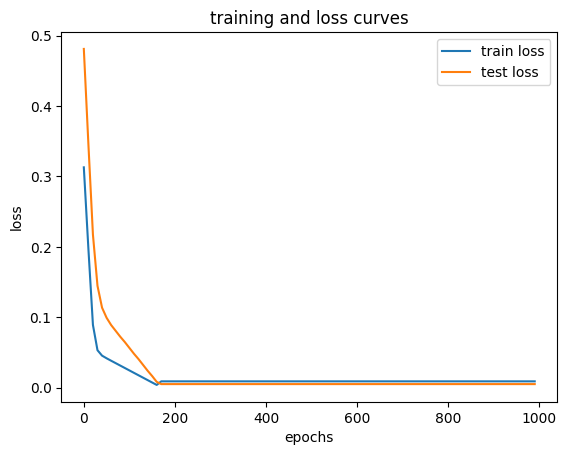

In [ ]:
plt.plot(epochs_count, train_loss_values, label='train loss')
plt.plot(epochs_count, test_loss_values, label='test loss')
plt.title('training and loss curves')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend();

In [ ]:
# find our  model's learned parameters
print('the model learned following values for weights and bias:')
print(model_0.state_dict())
print('\nAnd original values for weights and bias are:')
print(f'weights:{weight}, bias:{bias}')

the model learned following values for weights and bias:
OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

And original values for weights and bias are:
weights:0.7, bias:0.3


## Making prediction

In [ ]:
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

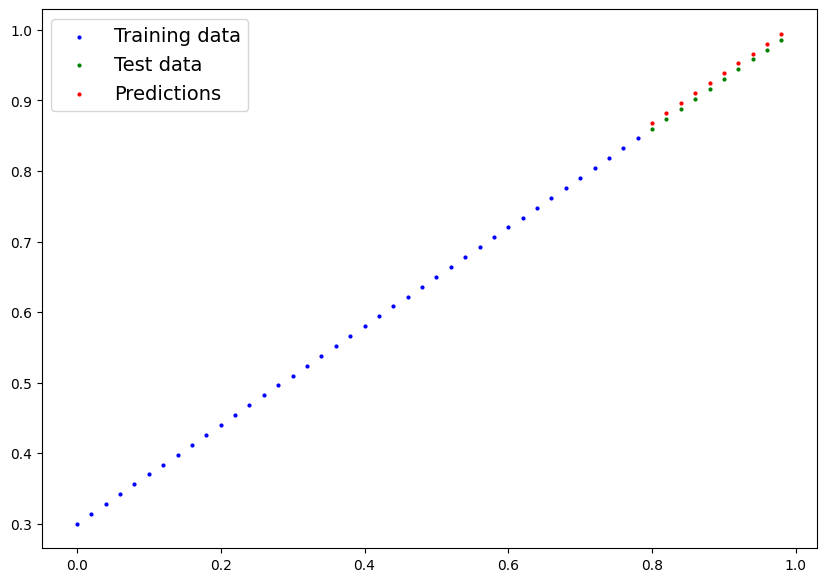

In [ ]:
plot_prediction(prediction=y_preds)

##save dataset

In [ ]:
from pathlib import Path

#1.create model dictionary
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. create model save path
MODEL_NAME = '01_pytorch_worckflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH/ MODEL_NAME

#3. save the model state dict
print(f'saving model to:{MODEL_SAVE_PATH}')
torch.save(obj= model_0.state_dict(),f= MODEL_SAVE_PATH)

saving model to:models/01_pytorch_worckflow_model_0.pth


## import *dataset*

In [ ]:
#instantiates a new instance of our model
loaded_model_0 = LinearRegressionModel()

#load the state_dict of our saved model
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
#1. put the loaded model into evaluation mode
loaded_model_0.eval()

#2. use the inferecnce mode context manager to make predictions
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [ ]:
#compare previous model predictions with loaded model prediction
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])